In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

sns.set()

# The Enscombe Quartet

The Enscombe quartet consists of 4 different datasets, each of $n = 11$ data points, but which share a number of properties. While the datasets are very different, it turns out that running a linear regression on each one of them returns almost the same $\hat{\beta}$ and $\hat{\alpha}$ coefficients, $R^2$ coefficient and some other statistics, up to 2 or 3 decimal places.

We will analyse each dataset separately and compare them. For future reference, let us also point out that:

- High leverage points should have at least $\frac{4}{n} \approx 0.36$ leverage.
- Outliers should have at least 3 (or 4) value for the standardized residual.



### Importing data

In [2]:
df = pd.read_csv('Enscombe.csv')
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      11 non-null     int64  
 1   Y1      11 non-null     float64
 2   X2      11 non-null     int64  
 3   Y2      11 non-null     float64
 4   X3      11 non-null     int64  
 5   Y3      11 non-null     float64
 6   X4      11 non-null     int64  
 7   Y4      11 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 836.0 bytes


In [4]:
Summary = pd.DataFrame(columns = ['beta', 'beta error', 'beta - p value', 'R2', 'Adj R2', 'F-stat', 'Intercept', 'Intercept error', 'Intercept p-value'])

### First Dataset

The first dataset is the one that is closest to a 'pure' linear model. There are no outliers, no points of high leverage, and the residuals turn out to be normally distributed. Hence, the assumptions of linear regression are satisfied in this case:

- Linear model
- Residuals are somewhat normally distributed.
- No outliers, no high leverage points.


In [5]:
X1, Y1 = df['X1'], df['Y1']
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 16 Jun 2023   Prob (F-statistic):            0.00217
Time:                        10:18:56   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
X1             0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# 'beta', 'beta error', 'beta - p value', 'R2', 'Adj R2', 'F-stat', 'Intercept', 'Intercept error', 'Intercept p-value'
Summary.loc[0] = [0.5001, 0.118, 4.241, 0.667, 0.629, 17.99, 3.0001, 1.125, 2.667]

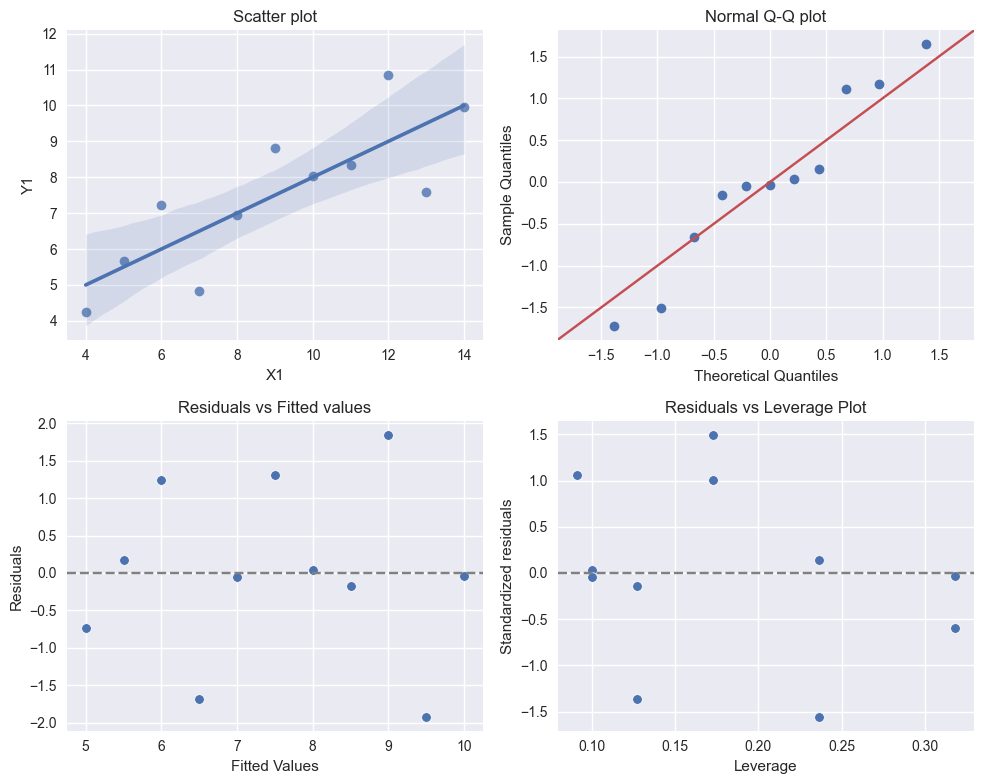

In [10]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag

# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
plt.style.use('seaborn')

# Scatter plot
sns.regplot(x=X1, y=Y1, ax=ax[0, 0])
ax[0, 0].set_xlabel('X1')
ax[0, 0].set_ylabel('Y1')
#ax[1, 0].lineplot(x=X1, y=fitted_value, color='grey', linestyle='dashed')
ax[0, 0].set_title('Scatter plot')

# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q plot')

# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Residuals')
ax[1, 0].set_title('Residuals vs Fitted values')

# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized residuals')
ax[1, 1].set_title('Residuals vs Leverage Plot')

plt.tight_layout()
plt.show()

### Second Dataset

The second dataset is a model that is not linear, as can be seen in a simple scatter plot. One can blindly run a linear regression on this model and check what it returns. While the QQ plot is not much different compared to the first dataset, we see that there is a clear pattern in the residuals, indicating that the model is not appropriate for our purposes.

- Non-linear model.
- Clear pattern in residual vs fitted value plot.

In [8]:
X2, Y2= df['X2'], df['Y2']
X2_c = sm.add_constant(X2)
result = sm.OLS(Y2, X2_c).fit()

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 16 Jun 2023   Prob (F-statistic):            0.00218
Time:                        10:19:48   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.026       0.455       5.547
X2             0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# 'beta', 'beta error', 'beta - p value', 'R2', 'Adj R2', 'F-stat', 'Intercept', 'Intercept error', 'Intercept p-value'
Summary.loc[1] = [0.5000, 0.118, 4.239, 0.666, 0.629, 17.97, 3.0009, 1.125, 2.667]

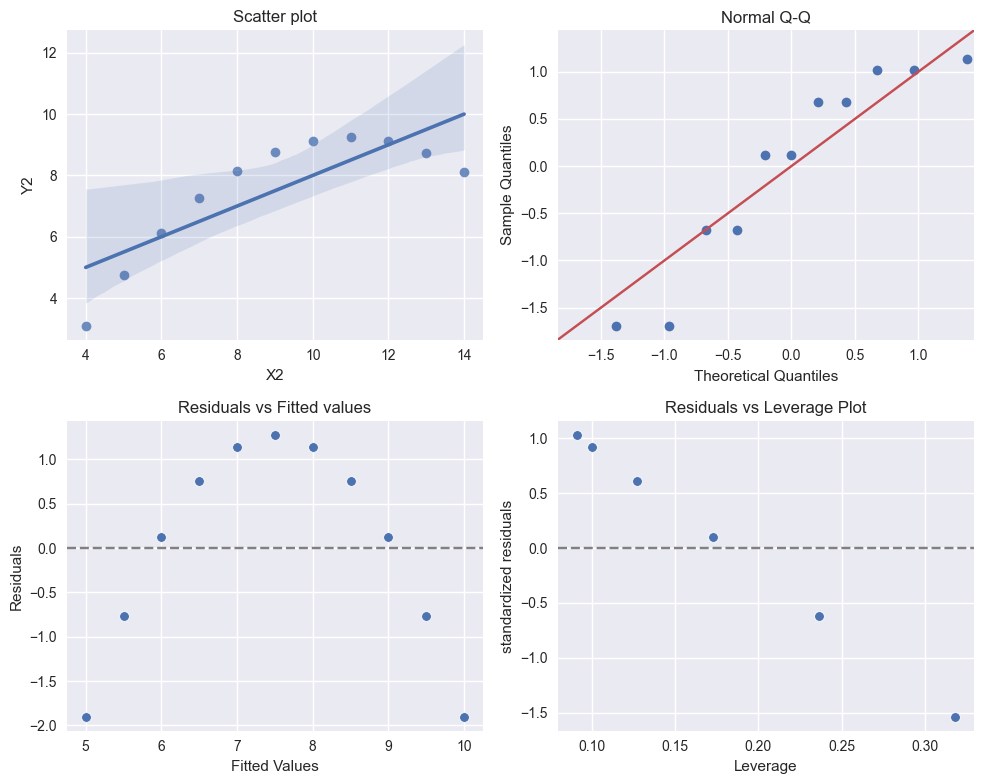

In [23]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag

# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
plt.style.use('seaborn')

# Scatter plot
sns.regplot(x=X2, y=Y2, ax=ax[0, 0])
ax[0, 0].set_xlabel('X2')
ax[0, 0].set_ylabel('Y2')
#ax[1, 0].lineplot(x=X1, y=fitted_value, color='grey', linestyle='dashed')
ax[0, 0].set_title('Scatter plot')

# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')

# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Residuals')
ax[1, 0].set_title('Residuals vs Fitted values')

# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('standardized residuals')
ax[1, 1].set_title('Residuals vs Leverage Plot')

plt.tight_layout()
plt.show()

- Note that a much better fit here would be given by some polynomial regression - quadratic would do here.

In [30]:
X2 = X2.array.reshape(-1, 1)

<PandasArray>
[
[10],
[8],
[13],
[9],
[11],
[14],
[6],
[4],
[12],
[7],
[5]
]
Shape: (11, 1), dtype: int64

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

trans = PolynomialFeatures(degree=2, include_bias=False)
trans.fit(X2)
X2_new = trans.transform(X2)

reg = LinearRegression()
reg.fit(X2_new, Y2)

y_pred = reg.predict(X2_new)

In [38]:
reg.score(X2_new, Y2)

0.999999457857722

Text(0.5, 1.0, 'Normal Q-Q')

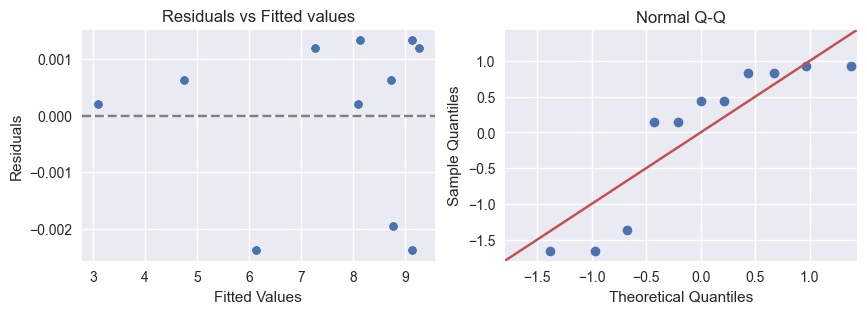

In [37]:
residuals = y_pred - Y2

# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=y_pred, y=residuals, ax=ax[0])
ax[0].axhline(y=0, color='grey', linestyle='dashed')
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[1], c='#4C72B0')
ax[1].set_title('Normal Q-Q')

- If we want to see the coefficients, we use the sm module, as before:

In [45]:
X2, Y2= df['X2'], df['Y2']
X2_c = sm.add_constant(X2)
X2_c['X2_sq'] = X2_c['X2']**2

result = sm.OLS(Y2, X2_c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           8.64e-26
Time:                        09:43:18   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9957      0.004  -1384.713      0.000      -6.006      -5.986
X2             2.7808      0.001   2673.741      0.000       2.778       2.783
X2_sq         -0.1267   5.71e-05  -2219.238      0.000      -0.127      -0.127
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Third Dataset

The third dataset is again a linear model, but there is a significant outlier among the data points. Running a linear regression with this outlier leads to a significant change in the linear model. We will see that eliminating the outlier one obtains an almost perfect fit, otherwise.

- Linear model with an Outlier
- Outlier has standardized residual just above 3
- With outlier we have: $R^2 \approx 0.66$, with $\beta \approx 0.4997$.
- Removing outlier, we have: $R^2 = 1$, with $\beta \approx 0.3454$.

In [11]:
X3, Y3 = df['X3'], df['Y3']
X3_c = sm.add_constant(X3)
result = sm.OLS(Y3, X3_c).fit()

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 16 Jun 2023   Prob (F-statistic):            0.00218
Time:                        10:19:58   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.026       0.459       5.546
X3             0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# 'beta', 'beta error', 'beta - p value', 'R2', 'Adj R2', 'F-stat', 'Intercept', 'Intercept error', 'Intercept p-value'
Summary.loc[2] = [0.4997, 0.118, 4.239, 0.666, 0.629, 17.97, 3.0025, 1.124, 2.670]

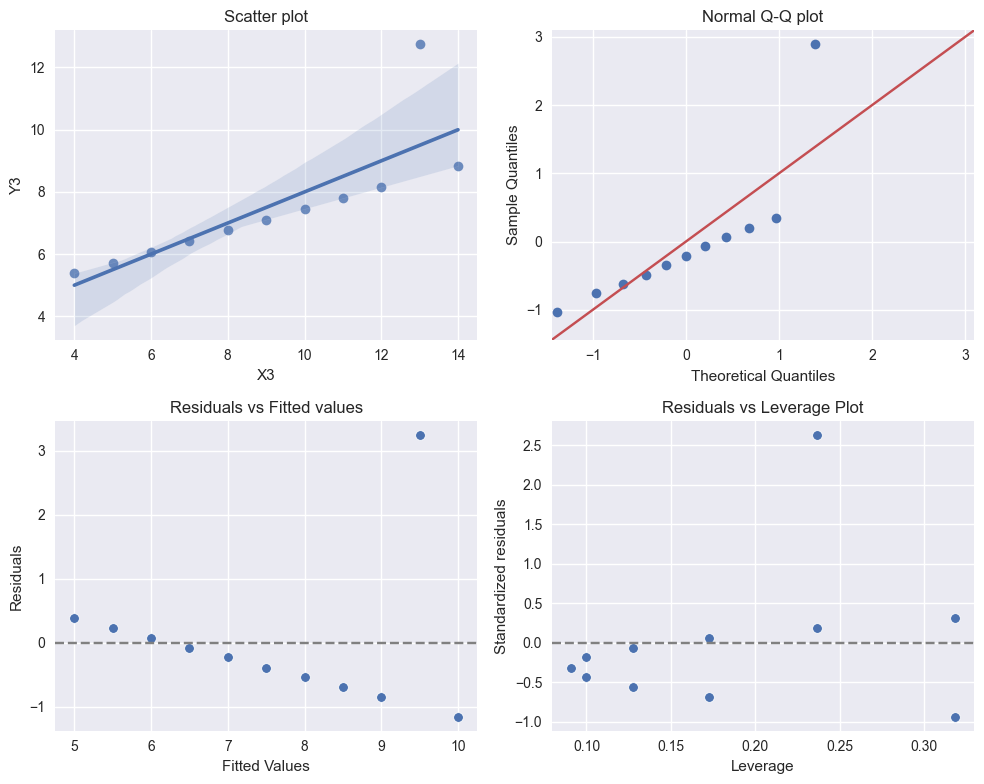

In [49]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag

# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
plt.style.use('seaborn')

# Scatter plot
sns.regplot(x=X3, y=Y3, ax=ax[0, 0])
ax[0, 0].set_xlabel('X3')
ax[0, 0].set_ylabel('Y3')
#ax[1, 0].lineplot(x=X1, y=fitted_value, color='grey', linestyle='dashed')
ax[0, 0].set_title('Scatter plot')

# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q plot')

# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Residuals')
ax[1, 0].set_title('Residuals vs Fitted values')

# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized residuals')
ax[1, 1].set_title('Residuals vs Leverage Plot')

plt.tight_layout()
plt.show()

In [50]:
print(np.count_nonzero(stand_resids >= 2.5))
np.where(stand_resids >= 2.5)

1


(array([2], dtype=int64),)

- Let us now remove the outlier and fit the data again.

In [51]:
X3, Y3 = X3.drop(2), Y3.drop(2)

X3_c = sm.add_constant(X3)
result = sm.OLS(Y3, X3_c).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           6.17e-22
Time:                        09:45:43   Log-Likelihood:                 44.749
No. Observations:                  10   AIC:                            -85.50
Df Residuals:                       8   BIC:                            -84.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0056      0.003   1369.808      0.000       3.999       4.012
X3             0.3454      0.000   1077.352      0.000       0.345       0.346
==============================================================================
Omnibus:                        0.202   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.377
Skew:                           0.156   Prob(JB):                        0.828
Kurtosis:                       2.101   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

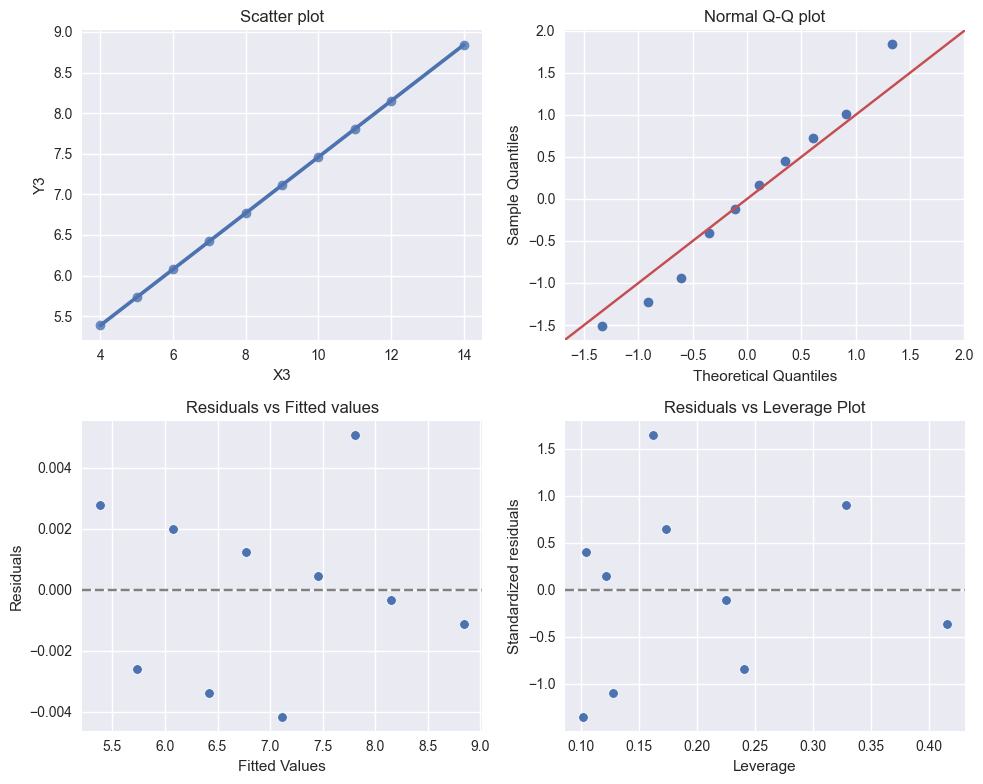

In [53]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag

# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
plt.style.use('seaborn')

# Scatter plot
sns.regplot(x=X3, y=Y3, ax=ax[0, 0])
ax[0, 0].set_xlabel('X3')
ax[0, 0].set_ylabel('Y3')
#ax[1, 0].lineplot(x=X1, y=fitted_value, color='grey', linestyle='dashed')
ax[0, 0].set_title('Scatter plot')

# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q plot')

# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Residuals')
ax[1, 0].set_title('Residuals vs Fitted values')

# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized residuals')
ax[1, 1].set_title('Residuals vs Leverage Plot')

plt.tight_layout()
plt.show()

### Fourth Dataset

Finally, the last dataset contains a point with high leverage. Most points have the same $x$ value, namely $x=8$, with the 'perfect' fit being just a vertical line. Meanwhile, there is a point at $x=19$, which changes this fit when running a linear regression.

- A high leverage point for odd x value.
- Weird point has leverage value of about 1, which is very large for the value of $n$.

In [14]:
X4, Y4 = df['X4'], df['Y4']
X4_c = sm.add_constant(X4)
result = sm.OLS(Y4, X4_c).fit()

In [55]:
X4

0      8
1      8
2      8
3      8
4      8
5      8
6      8
7     19
8      8
9      8
10     8
Name: X4, dtype: int64

In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y4   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Tue, 13 Jun 2023   Prob (F-statistic):            0.00216
Time:                        09:59:37   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.026       0.459       5.544
X4             0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# 'beta', 'beta error', 'beta - p value', 'R2', 'Adj R2', 'F-stat', 'Intercept', 'Intercept error', 'Intercept p-value'
Summary.loc[3] = [0.4999, 0.118, 4.243, 0.667, 0.630, 18.00, 3.0017, 1.124, 2.671]

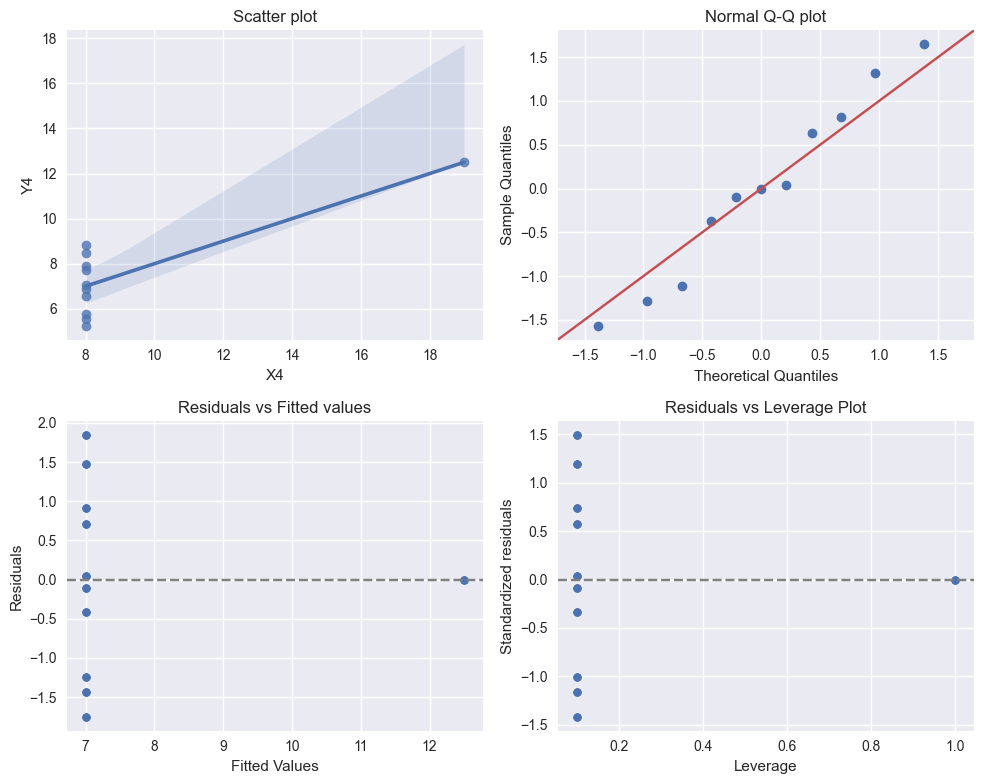

In [57]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag

# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
plt.style.use('seaborn')

# Scatter plot
sns.regplot(x=X4, y=Y4, ax=ax[0, 0])
ax[0, 0].set_xlabel('X4')
ax[0, 0].set_ylabel('Y4')
#ax[1, 0].lineplot(x=X1, y=fitted_value, color='grey', linestyle='dashed')
ax[0, 0].set_title('Scatter plot')

# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q plot')

# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Residuals')
ax[1, 0].set_title('Residuals vs Fitted values')

# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized residuals')
ax[1, 1].set_title('Residuals vs Leverage Plot')

plt.tight_layout()
plt.show()

In [58]:
print(np.count_nonzero(leverage >= 0.8))
np.where(leverage >= 0.8)

1


(array([7], dtype=int64),)

- Of course, removing this point we would just obtain a vertical fit!

### Comparing the 4 datasets

- We have seen that 3 of the datasets do not satisfy the assumptions of linear regression. However, running a linear regression 'blindly' leads to some remarkable similarities, as we see below:

In [71]:
Summary

,beta,beta error,beta - p value,R2,Adj R2,F-stat,Intercept,Intercept error,Intercept p-value
0,0.5001,0.118,4.241,0.667,0.629,17.99,3.0001,1.125,2.667
1,0.5000,0.118,4.239,0.666,0.629,17.97,3.0009,1.125,2.667
2,0.4997,0.118,4.239,0.666,0.629,17.97,3.0025,1.124,2.670
3,0.4999,0.118,4.243,0.667,0.630,18.00,3.0017,1.124,2.671


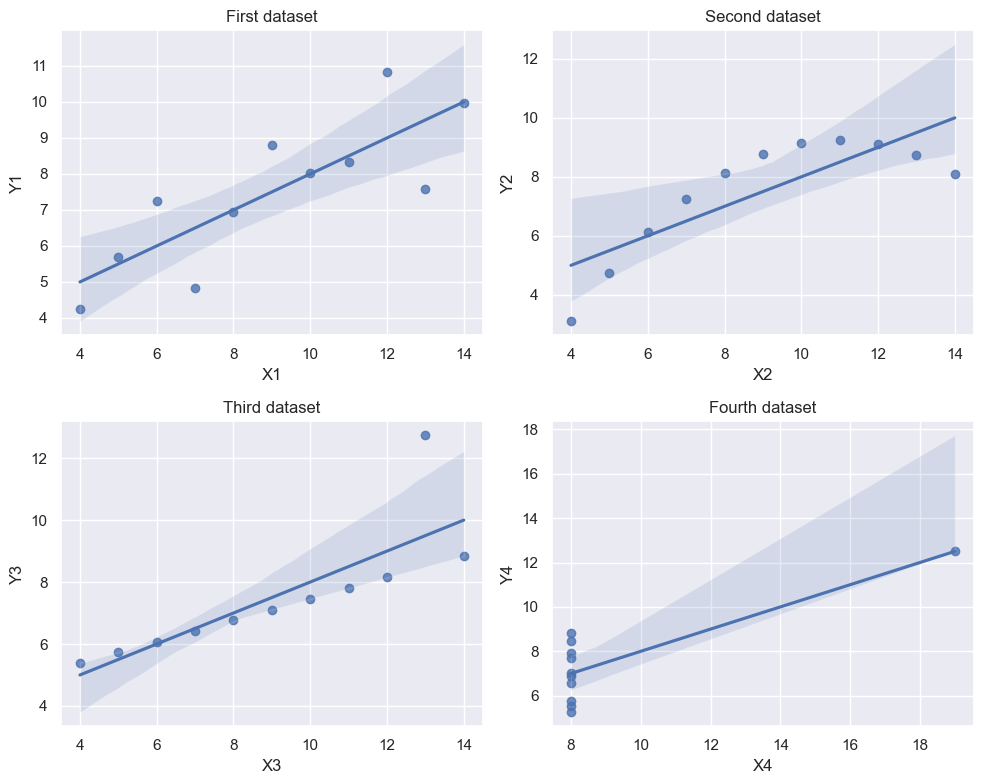

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  
# plt.style.use('seaborn')

# Scatter plot
sns.regplot(x=df['X1'], y=df['Y1'], ax=ax[0, 0])
ax[0, 0].set_xlabel('X1')
ax[0, 0].set_ylabel('Y1')
ax[0, 0].set_title('First dataset')

# Scatter plot
sns.regplot(x=df['X2'], y=df['Y2'], ax=ax[0, 1])
ax[0, 1].set_xlabel('X2')
ax[0, 1].set_ylabel('Y2')
ax[0, 1].set_title('Second dataset')

# Scatter plot
sns.regplot(x=df['X3'], y=df['Y3'], ax=ax[1, 0])
ax[1, 0].set_xlabel('X3')
ax[1, 0].set_ylabel('Y3')
ax[1, 0].set_title('Third dataset')

# Scatter plot
sns.regplot(x=df['X4'], y=df['Y4'], ax=ax[1, 1])
ax[1, 1].set_xlabel('X4')
ax[1, 1].set_ylabel('Y4')
ax[1, 1].set_title('Fourth dataset')

plt.tight_layout()
plt.show()